In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
print('Total Rows: ',df.shape[0], '\nTotal Cols: ',df.shape[1] )

Total Rows:  8807 
Total Cols:  12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.fillna({'director':'Unknown'},inplace=True)
df['date_added'] = df['date_added'].ffill()
df.fillna({'cast':'Unknown'},inplace=True)

In [6]:
df.fillna({'country':'NA'},inplace=True)
df.fillna({'rating':'NA'},inplace=True)
df.fillna({'duration':'NA'},inplace=True)

In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
df.to_csv('netflix_cleaned_data.csv',index = False)

# Cast and Director are Unknown while others are NA

## How many Movies and TV shows are there?

Text(0, 0.5, 'No. Of Count')

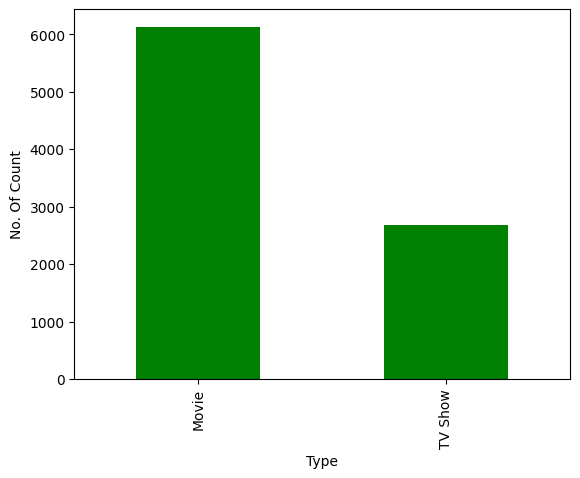

In [9]:
y= df['type'].value_counts().plot(kind = 'bar',color='green')
plt.xlabel('Type')
plt.ylabel('No. Of Count')

## Analysis:
1. The count of <b>Movies</b> is far greater as compared to the <b>TV shows</b>
2. This derives the conclusion that the production and the content availability of <b>Movies</b> is <b>Higher</b>

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,NA,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df['date_added'] = pd.to_datetime(df['date_added'],format = 'mixed')

In [12]:
year = df['date_added'].dt.year

Text(0.5, 1.0, 'No. Of Content Added Each Year')

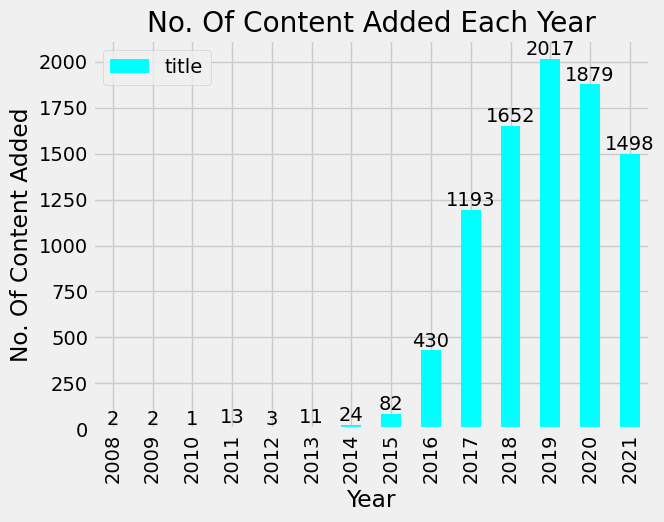

In [106]:
data = df['title'].groupby(year).count()
for i,v in enumerate(data):
    plt.text(i,v + 20,str(v),ha ='center')
data.plot(kind = 'bar',color='cyan')
plt.xlabel('Year')
plt.ylabel('No. Of Content Added')
plt.legend(loc='upper left')
plt.title('No. Of Content Added Each Year')

## 🧠 Quick Reflection:

### Do you notice a massive increase starting from 2016?
### =>Yes, it is a massive increase in the content adding.
### Did 2020 (the pandemic year) affect content addition?
### => Yes, it started decreasing the content addtion.
### Is there a dip or peak worth noting?
### =>Yes, the Year 2016 is the peak of content addition and after the pandemic year [2019] the dip started.

# Top Five Countries Producing Netflix Content

In [14]:
top_countries = df[df['country'] != 'NA']['country'].value_counts().head(10)
top_countries

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

Text(0.5, 1.0, 'Top Five Countries Producing Netlfix Content')

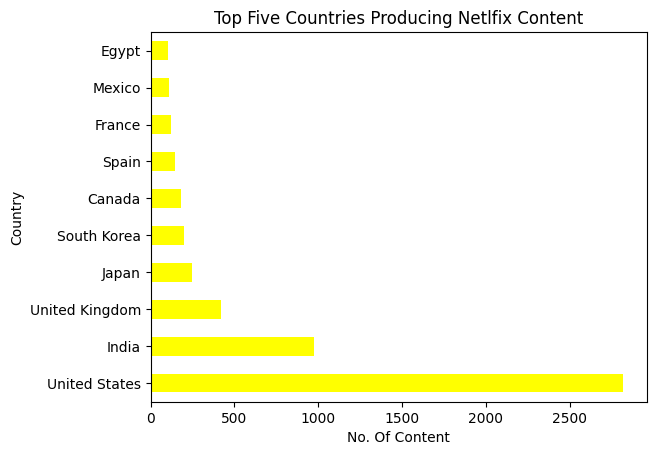

In [15]:
top_countries.plot(kind = 'barh',color='yellow')
plt.xlabel('No. Of Content')
plt.ylabel('Country')
plt.title('Top Five Countries Producing Netlfix Content')

# Analysis:
1. <b>U.S.</b> Dominates in Content Creation On <b>Netflix</b>.
2. While <b>India</b> stand's out as a <b>Top Second</b> - Reflecting Netflix's investment in Indian content.
3. Asian Countries like <b>Japan and South Africa</b> also have a strong presence.
4. On the other scenario European Countries like <b>U.K.,France and Spain</b> also have Good contributions.

# Genre (Content Category) Analysis

In [16]:
df.rename(columns = {'listed_in':'genre'},inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,NA,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
genres = df['genre'].apply(lambda x: x.split(',')).explode().value_counts().head(10)
genres = (
    df['genre']
    .dropna()  # optional, if there are NaNs
    .apply(lambda x: [i.strip() for i in x.split(',')])  # strip spaces
    .explode()
)

# Now value_counts will treat all "Dramas" equally
top_genres = genres.value_counts().head(10)


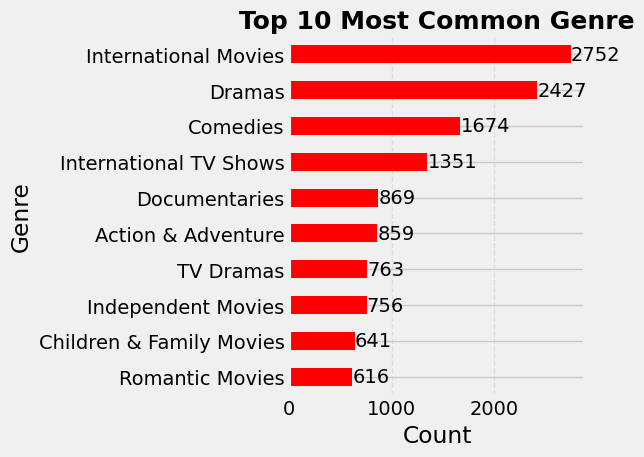

In [101]:
plt.style.use('fivethirtyeight')
top_genres.plot(kind = 'barh',cmap='autumn')
for i,v in enumerate(top_genres):
    plt.text(v + 0.5,i,str(v),va='center')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Most Common Genre',loc = 'center',fontsize=18,fontweight='bold')
plt.gca().invert_yaxis()  # Optional: puts the highest bar at the top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Analysis:
## 1. Which genres are the most popular on Netflix?
## => International Movies and Dramas and Comedy type of Content are most popular.
## 2. Do certain genres dominate?
## => International Movies and Dramas are Dominating the whole netflix and while others are also had a great contribution.
## 3. Are there clear genre trends (e.g., more comedy, drama, or action)?
## => Yes, there are the trends of Comedy, Action and Adventure type of Genres.

# Movies and TV Shows Proportions

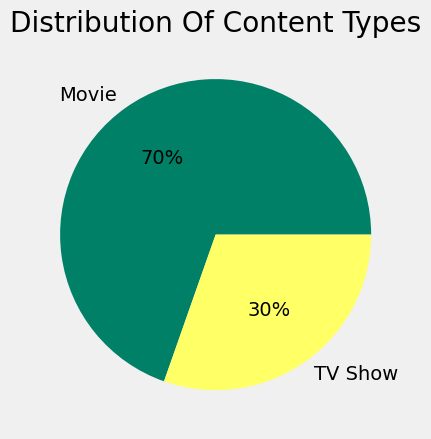

In [67]:
df['type'].value_counts().plot(kind ='pie',autopct='%1.f%%',cmap='summer')
plt.title('Distribution Of Content Types')
plt.ylabel('')
plt.show()

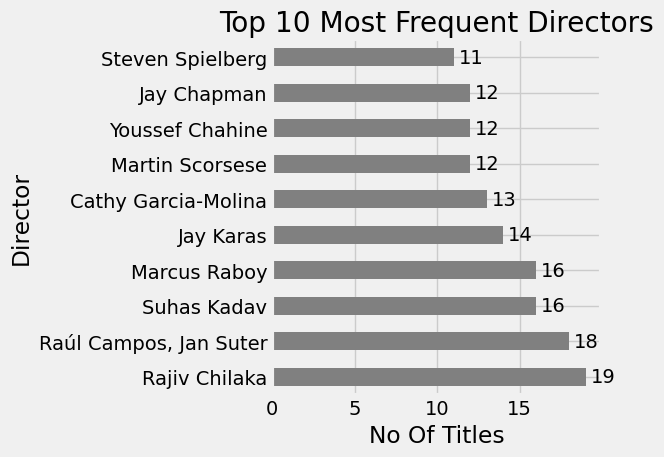

In [97]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().sort_values(ascending = False).head(10)
for i, v in enumerate(top_directors):
    plt.text(v + 0.3, i, str(v), va='center')
top_directors.plot(kind='barh',color='gray')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('No Of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.grid(True)

Text(0, 0.5, 'Actors')

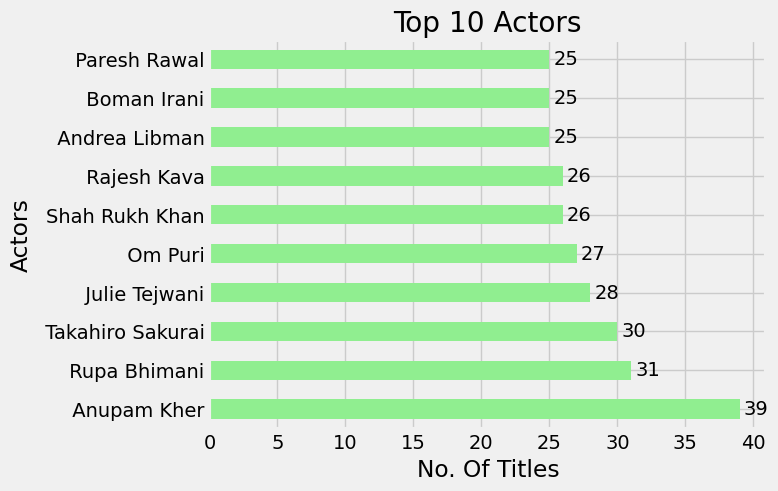

In [138]:
cast = df[df['cast'] != 'Unknown']['cast'].apply(lambda x: x.split(',')).explode().value_counts().sort_values(ascending= False).head(10)
# cast = df['cast'].dropna().apply(lambda x: [i.strip() for i in x.split(',')]).explode()
for i,v in enumerate(cast):
    plt.text(v+ 0.3,i,str(v),va = 'center')
cast.plot(kind = 'barh',color='lightgreen')
plt.title('Top 10 Actors')
plt.xlabel('No. Of Titles')
plt.ylabel('Actors')